# Credit Card Fraud Detection

Credit card fraud detection is a critical application of machine learning that focuses on identifying unauthorised and fraudulent transactions in credit card transactions. With the widespread use of credit cards for both online and offline purchases, the risk of fraudulent activities has increased significantly. Fraudulent transactions can result in financial loses for both cardholders and financial institutions. Machine learning, particularly supervised learning techniques, has emerged as a powerful tool to combat this issue. By training model on historical transaction data, machine learning algorithms can learn to distinguish between legitimate and fraudulent transaction based on various features such as transacton amount, location, time and more. This allows for real-time monitoring and immediate detection of suspicious activities, helping financial institutions and cardholders take timely action to mitigate potential losses. In this project, we will explore the development of a credit card fraud detection system using Support Vector Machine algorithm to enhance the security of financial transactions and protect cardholders from unauthorised charges.

**Importing relevant Python libraries**

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score

# 1. Data Understanding: Loading and exploring dataset

In [124]:
df=pd.read_csv('creditcard.csv',nrows=10000)
pd.set_option("display.max_columns",31)
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15001,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,0.331248,-0.406853,-3.076411,1.421080,1.885435,-0.335264,0.700895,-0.076694,0.158451,-0.815829,-0.098736,-0.228112,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,53.19,0
9996,15004,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,-0.531014,0.950229,-2.357223,1.395353,1.606754,0.553204,0.429342,0.452575,-0.216733,-0.365549,-0.121607,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18,0
9997,15008,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,-1.586419,0.107872,-2.325503,1.170943,1.271288,-1.118945,0.345479,0.722130,-0.026780,-0.641398,-0.263964,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,4.05,0
9998,15010,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,-1.373455,0.433736,-2.364680,1.342560,2.038849,-0.099721,0.782406,0.567083,-0.049721,-0.862833,-0.239655,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,4.05,0


In [126]:
shape= df.shape
print("The dimension of our dataset is as follows", shape, "\n")


The dimension of our dataset is as follows (10000, 31) 



In [127]:
print("The information about the data type of each colums is as follows: ")
df.info()


The information about the data type of each colums is as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20   

In [128]:
print("Checking the missing/NaN values from each column of the dataframe:", df.isnull().sum())

Checking the missing/NaN values from each column of the dataframe: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [137]:
df.describe()  #getting the discription of our dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000,19924.000000
mean,7510.882654,-1.024944,2.042227,-2.754391,2.935299,-0.663457,-0.981241,-1.938022,0.544592,-0.738072,-3.285692,3.595378,-5.629689,0.620924,-4.501906,-0.199943,-2.252415,-2.917256,-0.868162,0.037642,0.248425,0.348882,-0.156448,-0.029615,-0.174799,0.049479,0.208903,0.270441,0.179640,0.041270,0.500000
std,4119.683046,1.938859,2.557156,4.614685,3.288917,1.877857,1.714815,3.277650,1.594354,2.303342,4.047001,3.638391,5.370363,0.995202,6.242115,0.967653,3.560845,5.463476,2.144134,1.237101,0.756473,0.911957,0.517543,0.572267,0.594058,0.896787,0.474776,0.839241,0.388612,1.372221,0.500013
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,-0.341670,0.000000
25%,3771.000000,-2.303350,0.222753,-5.726872,0.217357,-1.730411,-2.420168,-3.496197,-0.103813,-2.214311,-5.576023,0.660009,-8.873748,-0.067498,-9.177166,-0.807478,-3.075092,-4.835112,-1.243248,-0.662462,-0.102729,-0.170547,-0.516242,-0.310804,-0.425550,-0.393844,-0.145362,-0.047980,0.004590,-0.336249,0.000000
50%,8090.000000,-0.697839,1.528474,-0.875334,2.375712,-0.459794,-0.989908,-0.746579,0.255487,-0.270953,-1.351237,2.358507,-3.174149,0.543068,-1.470102,-0.257025,-0.896575,-0.350986,-0.216502,-0.024288,0.169518,0.161934,-0.095935,-0.024434,-0.134040,0.092007,0.319476,0.171554,0.109296,-0.330937,0.500000
75%,11080.000000,0.737636,3.712889,1.002643,5.928191,0.464388,-0.027497,0.133742,1.063728,0.879197,-0.302310,6.316210,-1.504569,1.361193,0.908572,0.514288,0.170183,0.599717,0.364155,0.771965,0.504646,0.615642,0.183384,0.204935,0.255398,0.471162,0.523574,0.600485,0.402528,-0.176934,1.000000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,41.465346,1.000000


# 2. Exploratory Data Analysis (EDA)

**2.1 Checking class imbalance of Credit_card fraud detection. Visualised with pie chart and histogram.**

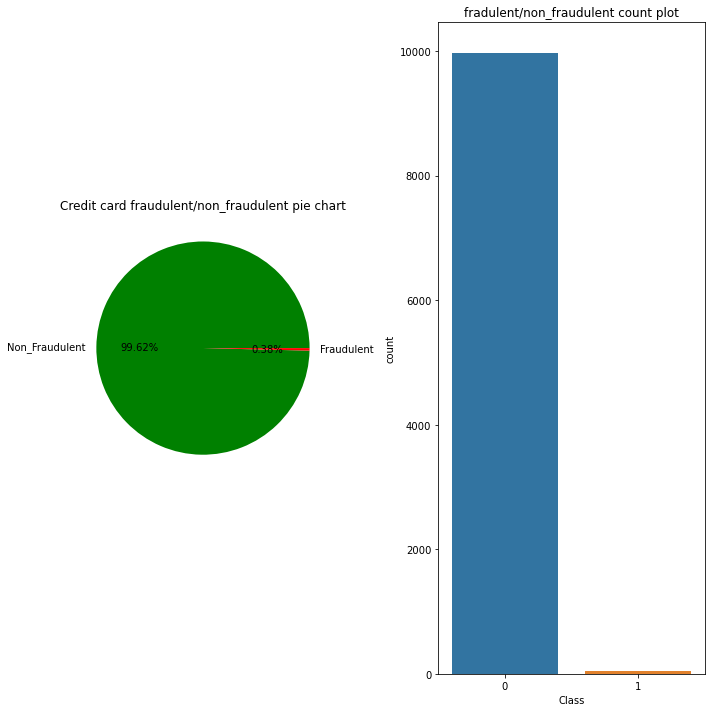

In [130]:


target_dictionary= df['Class'].value_counts().to_dict()
target_counts=[target_dictionary[0],target_dictionary[1]]

colour=['green','red']
counts_label=['Non_Fraudulent','Fraudulent']

fig,axes= plt.subplots(1,2,figsize=(10,10)) #creating subplots



#pie
axes[0].pie(target_counts, labels=counts_label, colors= colour, autopct='%1.2f%%')
axes[0].set_title('Credit card fraudulent/non_fraudulent pie chart')

#histogram for count plot
sns.countplot(x=df['Class'], data=df, ax=axes[1])
axes[1].set_title('fradulent/non_fraudulent count plot')


plt.tight_layout()
plt.show()


**2.2 visualising the relationship between "time" and "amount" to the target "variable"**

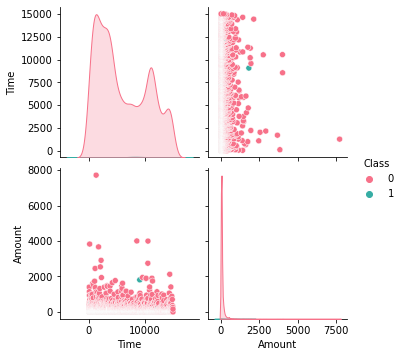

In [131]:

sns.pairplot(df, hue='Class',vars=['Time','Amount'], palette='husl')

# 3.  Data Preprocessing: Prepare the data modelling by handling missing values, encoding catagorical variables, scaling numerical features and handling class imbalance

**3.1 Scaling the feature (Amount) since it has not undergone PCA**

StandardScaler scales and centers features (variables) so that the have a mean of 0 and standard deviation of 1. 
This ensures that all features have the same scale. Algorithms like Support Vector Machine and  k-means clustering are particularly sensitive to feature scaling. Standard scaler also improves the performance, stability and interpretability of machine learning models by ensuring that feature are on consistent scales.

In [132]:
scaler= StandardScaler()
df['Amount']= scaler.fit_transform(df[['Amount']])
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.469380,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.327088,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.710945,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.327791,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.037727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15001,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,0.331248,-0.406853,-3.076411,1.421080,1.885435,-0.335264,0.700895,-0.076694,0.158451,-0.815829,-0.098736,-0.228112,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,-0.053341,0
9996,15004,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,-0.531014,0.950229,-2.357223,1.395353,1.606754,0.553204,0.429342,0.452575,-0.216733,-0.365549,-0.121607,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,-0.275645,0
9997,15008,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,-1.586419,0.107872,-2.325503,1.170943,1.271288,-1.118945,0.345479,0.722130,-0.026780,-0.641398,-0.263964,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,-0.319716,0
9998,15010,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,-1.373455,0.433736,-2.364680,1.342560,2.038849,-0.099721,0.782406,0.567083,-0.049721,-0.862833,-0.239655,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,-0.319716,0


**3.2 Balancing our class through resampling since non-fraud outcomes far surpasses fraud outcome**

In [133]:
minority_class= df[df['Class']==1]
majority_class= df[df['Class']==0]

minority_upsampling =resample(minority_class,
                             replace=True,
                             n_samples= len(majority_class),
                             random_state=42)

upsampling_concat= pd.concat([minority_upsampling, majority_class])

df= upsampling_concat.sort_index()  #sort_index sorts the data according to its index

display(df)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.469380,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.327088,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.710945,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.327791,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.037727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15001,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,0.331248,-0.406853,-3.076411,1.421080,1.885435,-0.335264,0.700895,-0.076694,0.158451,-0.815829,-0.098736,-0.228112,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,-0.053341,0
9996,15004,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,-0.531014,0.950229,-2.357223,1.395353,1.606754,0.553204,0.429342,0.452575,-0.216733,-0.365549,-0.121607,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,-0.275645,0
9997,15008,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,-1.586419,0.107872,-2.325503,1.170943,1.271288,-1.118945,0.345479,0.722130,-0.026780,-0.641398,-0.263964,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,-0.319716,0
9998,15010,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,-1.373455,0.433736,-2.364680,1.342560,2.038849,-0.099721,0.782406,0.567083,-0.049721,-0.862833,-0.239655,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,-0.319716,0


# 4. Feature selection: selecting the most relevant features from the dataset that will be used as input variables

**By looking at the relationship between time and target variable for fraud and non-fraud, there is no 
clear relationship since fraud can happen anytime, so is non-fraud. 
Thus, we drop 'Time' column as a feature.**

In [134]:
selected_features= df.drop(['Time'], axis=1)
display(selected_features)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.469380,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.327088,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.710945,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.327791,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.037727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,0.331248,-0.406853,-3.076411,1.421080,1.885435,-0.335264,0.700895,-0.076694,0.158451,-0.815829,-0.098736,-0.228112,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,-0.053341,0
9996,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,-0.531014,0.950229,-2.357223,1.395353,1.606754,0.553204,0.429342,0.452575,-0.216733,-0.365549,-0.121607,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,-0.275645,0
9997,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,-1.586419,0.107872,-2.325503,1.170943,1.271288,-1.118945,0.345479,0.722130,-0.026780,-0.641398,-0.263964,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,-0.319716,0
9998,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,-1.373455,0.433736,-2.364680,1.342560,2.038849,-0.099721,0.782406,0.567083,-0.049721,-0.862833,-0.239655,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,-0.319716,0


# 5. Model Training: Split the dataset into training and testing sets

**5.1 Training the dataset with the Support Vector Machine model**

In [135]:
X= (df.drop(['Class'], axis=1)).values
y= df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# 6. Model Evaluation: Evaluating the performance of the trained model using appropriate evaluation metrics, i.e accuracy, precision and f1 score

In [136]:
y_predict = svm_model.predict(X_test)  #predicting the testing set

accuracy = accuracy_score(y_test,y_predict)
precision= precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print('The accuracy score is: ', accuracy)
print('The precison score is: ', precision)
print('The f1 score is: ', f1)

The accuracy score is:  0.9997490589711417
The precison score is:  0.9995039682539683
The f1 score is:  0.9997519225998511
